In [1]:
import json, os, re
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [58]:
dir = "/content/gdrive/My Drive/hitm/training-datasets/"
filename = "bertflavorevaluations.json" 
path = os.path.join(dir,filename)
with open(path, "r") as f:
  data =json.load(f)
  data = data['data']
  


I dont care anymore VVVV

In [59]:
data

[{'EM': 0.14977973568281938,
  'f1': 0.3700728950115897,
  'model_name': 'deepset/roberta-base-squad2',
  'seconds_to_compute': 18.09691858291626,
  'top_n_accuracy': 0.8281938325991189,
  'total_score': 0.0744903866985456},
 {'EM': 0.07488986784140969,
  'f1': 0.3069740327195488,
  'model_name': 'twmkn9/albert-base-v2-squad2',
  'seconds_to_compute': 20.09769296646118,
  'top_n_accuracy': 0.6960352422907489,
  'total_score': 0.05363297890213041},
 {'EM': 0.07048458149779736,
  'f1': 0.24408657139615525,
  'model_name': 'mvonwyl/distilbert-base-uncased-finetuned-squad2',
  'seconds_to_compute': 8.904293298721313,
  'top_n_accuracy': 0.6519823788546255,
  'total_score': 0.10854915705521273},
 {'EM': 0.12334801762114538,
  'f1': 0.2997269486824004,
  'model_name': 'deepset/bert-base-cased-squad2',
  'seconds_to_compute': 16.698413133621216,
  'top_n_accuracy': 0.6696035242290749,
  'total_score': 0.06543606759450575}]

In [60]:
tmp = data[0]
data[0] = data[3]
data[3] = tmp
data[0]['model_name'] = 'BERT' #'roberta'
data[1]['model_name'] = 'ALBERT' #'albert'
data[2]['model_name'] = 'DistilBERT' #'distilbert'
data[3]['model_name'] = 'RoBERTa' #'bert'
data

[{'EM': 0.12334801762114538,
  'f1': 0.2997269486824004,
  'model_name': 'BERT',
  'seconds_to_compute': 16.698413133621216,
  'top_n_accuracy': 0.6696035242290749,
  'total_score': 0.06543606759450575},
 {'EM': 0.07488986784140969,
  'f1': 0.3069740327195488,
  'model_name': 'ALBERT',
  'seconds_to_compute': 20.09769296646118,
  'top_n_accuracy': 0.6960352422907489,
  'total_score': 0.05363297890213041},
 {'EM': 0.07048458149779736,
  'f1': 0.24408657139615525,
  'model_name': 'DistilBERT',
  'seconds_to_compute': 8.904293298721313,
  'top_n_accuracy': 0.6519823788546255,
  'total_score': 0.10854915705521273},
 {'EM': 0.14977973568281938,
  'f1': 0.3700728950115897,
  'model_name': 'RoBERTa',
  'seconds_to_compute': 18.09691858291626,
  'top_n_accuracy': 0.8281938325991189,
  'total_score': 0.0744903866985456}]

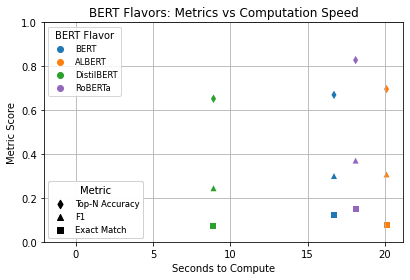

<Figure size 432x288 with 0 Axes>

In [63]:
import matplotlib.pyplot as plt
fig,ax=plt.subplots()
models = []
tests=[]
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:purple']
def plot(data, color):
  x = data['seconds_to_compute']
  topn = data['top_n_accuracy']
  f1 = data['f1']
  em = data['EM']
  models.append(ax.scatter(-1,-1,marker='o', c=color, label=data['model_name']))
  ax.scatter(x,topn,c=color, marker='d',edgecolors='none')
  ax.scatter(x,em,c=color, marker='s',edgecolors='none')
  ax.scatter(x,f1,c=color,  marker='^',edgecolors='none')
tests.append(ax.scatter(-1,-1,marker='d',c='black' ,label='Top-N Accuracy'))
tests.append(ax.scatter(-1,-1,marker='^',c='black', label='F1'))
tests.append(ax.scatter(-1,-1,marker='s',c='black', label='Exact Match'))
for i in range(0, len(colors)):
  plot(data[i], colors[i])
plt.ylabel("Metric Score")
plt.xlabel("Seconds to Compute")
plt.title("BERT Flavors: Metrics vs Computation Speed")
plt.tight_layout()
legend1 = ax.legend(handles=models,loc=2,title='BERT Flavor', fontsize='small')
ax.add_artist(legend1)
legend2 = ax.legend(handles=tests,loc=3,title='Metric', fontsize='small')
ax.add_artist(legend2)
ax.grid(True,)
ax.set(ylim=[0,1])
fig = plt.gcf()
fig.savefig(os.path.join(dir,'allmetricscatter'), dpi=300)
plt.show()
plt.draw()


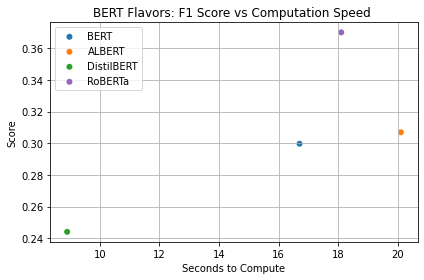

<Figure size 432x288 with 0 Axes>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


fig, ax = plt.subplots()
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:purple']
for i in range(0, len(colors)):
  x = data[i]['seconds_to_compute']
  y = data[i]['f1']
  ax.scatter(x, y, c=colors[i], label=data[i]['model_name'], edgecolors='none')

plt.ylabel("Score")
plt.xlabel("Seconds to Compute")
plt.title("BERT Flavors: F1 Score vs Computation Speed ")
plt.tight_layout()
ax.legend()
ax.grid(True)
fig = plt.gcf()
fig.savefig(os.path.join(dir,'f1-scatter'), dpi=100)
plt.show()
plt.draw()

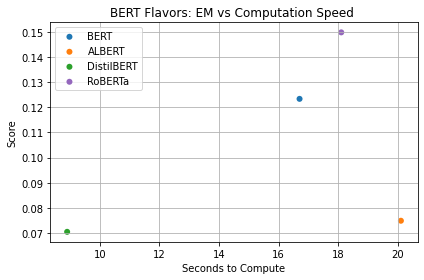

<Figure size 432x288 with 0 Axes>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


fig, ax = plt.subplots()
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:purple']
for i in range(0, len(colors)):
  x = data[i]['seconds_to_compute']
  y = data[i]['EM']
  ax.scatter(x, y, c=colors[i], label=data[i]['model_name'], edgecolors='none')

plt.ylabel("Score")
plt.xlabel("Seconds to Compute")
plt.title("BERT Flavors: EM vs Computation Speed ")
plt.tight_layout()
ax.legend()
ax.grid(True)
fig = plt.gcf()
fig.savefig(os.path.join(dir,'em-scatter'), dpi=100)
plt.show()
plt.draw()